# Importing dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

### important
Dont forget to install necessary libraries

```
pip install tensorflow keras numpy matplotlib ipython
```

### usage of libraries
**tensorflow** - various machine learning tasks, especially deep learning<br>
**keras** - part of tensorflow, Python interface for artificial neural networks<br>
**numpy** - fast scientific/numerical calculations<br>
**matplotlib** - visual representations of data<br>
**IPython** - utilities to display various media representations in Jupyter notebooks<br>

# Loading data into tensorflow dataset object

In [2]:
BATCH_SIZE = 16
IMAGE_SIZE = (256, 256)

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    shuffle = True,
    seed = 24
)

Found 16011 files belonging to 10 classes.


# What is tensorflow Dataset?

**tf Dataset** is a powerful framework designed to handle large datasets efficiently by loading data in batches and providing a lot of functions for preprocessing and data transformation, like filtering, mapping etc. 

In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

1001

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(16, 256, 256, 3)
[2 6 6 3 6 6 0 0 4 7 2 4 0 7 1 5]


**32** - batch size - number of images in one batch<br>
**(256, 256)** - the height and width of each image<br>
**3** - the number of channels in each image (RGB channels)<br>

In [7]:
"""
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
"""

'\nfor image_batch, label_batch in dataset.take(1):\n    print(image_batch.shape)\n    print(label_batch.numpy())\n'

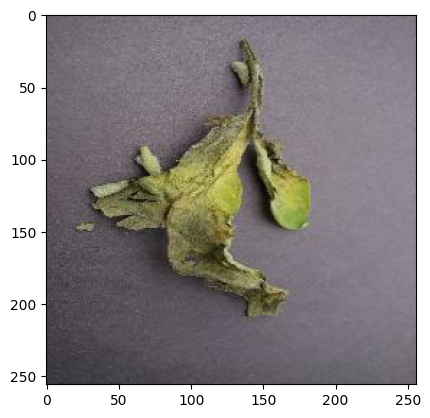

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.show

In [9]:
EPOCHS = 50

# Train test split

This allow you to train your model on some part of dataset, then validate and test on new/unseen data from your dataset

In [10]:
len(dataset)

1001

**80%** ==> training set<br>
**20%** ==> **10%** validation set, **10%** test set

**example**<br>
training_dataset = dataset.take(10)<br>
dataset = dataset.skip(10)

In [11]:
def get_partitioned_datasets(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
        if shuffle:
            dataset = dataset.shuffle(shuffle_size, seed=10)

        dataset_len = len(dataset)
    
        train_len = int(train_split*dataset_len)
        train_dataset = dataset.take(train_len)
        dataset = dataset.skip(train_len)

        val_len = int(val_split*dataset_len)
        val_dataset = dataset.take(val_len)
        dataset = dataset.skip(val_len)

        test_len = dataset_len - train_len - val_len
        test_dataset = dataset.take(test_len)

        return train_dataset, val_dataset, test_dataset

In [12]:
train_dataset, val_dataset, test_dataset = get_partitioned_datasets(dataset)

In [13]:
len(train_dataset)

800

In [14]:
len(val_dataset)

100

In [15]:
len(test_dataset)

101

In [16]:
# I deleted cache() in every dataset

train_dataset = train_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Data augmentation

In [17]:
ONE_IMAGE_SIZE = 256

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(ONE_IMAGE_SIZE, ONE_IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [19]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

### HOW WE RECOGNIZE IMAGES AS HUMANS?
small features of the image one by one, like eyes, tail, ears and so on<br>
**pri NN pouzijeme na toto FILTRE, napriklad 1 a -1 na rozpoznanie hran (=celych feature)**
### WHY WE NEED DENSE NEURAL NETWORK IN THE END?
because we will get different results from feature extraction and we need to classify if it is correct or no
### WHAT IS RELU ACTIVATION FUNCTION?
It makes all negative numbers 0 and all positive number stay
### WHY WE USE RELU ACTIVATION FUNCTION?
ReLU helps with making the model nonlinear. We have two types of functions in neural networks the base function(linear function) and activation function. The base function combines input multiplied by weights plus biases into a neuron and the activation function add non-linearity to the neuron to solve more complex problems.
### WHAT IS A PURPOSE OF POOLING?
To reduce a size of inputs. For example u take a window 2x2 and u pick the maximum value and u reduced the block to only one pixel. Filtering the noice, random numbers somewhere.
### CNN = FEATURE EXTRACTION + CLASSIFICATION

In [20]:
CHANNELS = 3
input_shape = (BATCH_SIZE, ONE_IMAGE_SIZE, ONE_IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# I have deleted two pairs of (2nd Conv2D and MaxPooling2D)

model.build(input_shape=input_shape)

C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# this will be the end of next episode, because that training take a enourmous amount of time
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (16, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (16, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (16, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (16, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (16, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (16, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (16, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (16, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (16, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (16, 12544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (16, 64)                    │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (16, 10)                    │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,778 (3.42 MB)

 Trainable params: 896,778 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# loss function measures how well the model's predictions match the true labels
# Optimizer updates the model's weights to minimize the loss function
# Metrics evaluate the whole model, its performance using varius criteria, for example accuracy

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
# Fit means training in the topics of neural networks
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=8,
)

Epoch 1/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 593s 614ms/step - accuracy: 0.4368 - loss: 1.5856 - val_accuracy: 0.7575 - val_loss: 0.6468
Epoch 2/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 661s 628ms/step - accuracy: 0.8067 - loss: 0.5955 - val_accuracy: 0.8931 - val_loss: 0.3118
Epoch 3/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 622s 607ms/step - accuracy: 0.8699 - loss: 0.3796 - val_accuracy: 0.9031 - val_loss: 0.2846
Epoch 4/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 651s 601ms/step - accuracy: 0.8931 - loss: 0.3127 - val_accuracy: 0.9356 - val_loss: 0.1838
Epoch 5/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 647s 580ms/step - accuracy: 0.9235 - loss: 0.2191 - val_accuracy: 0.9500 - val_loss: 0.1465
Epoch 6/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 625s 614ms/step - accuracy: 0.9405 - loss: 0.1742 - val_accuracy: 0.8838 - val_loss: 0.3117
Epoch 7/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 661s 645ms/step - accuracy: 0.9426 - loss: 0.1603 - val_accuracy: 0.9519 - val_loss: 0.1442
Epoch 8/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 651s 639ms/step - accuracy: 0.9498 - loss: 0

In [24]:
# You need to test performance of your model on new, never seen dataset
model.evaluate(test_dataset)

101/101 ━━━━━━━━━━━━━━━━━━━━ 140s 166ms/step - accuracy: 0.9645 - loss: 0.0959


[0.10237690061330795, 0.9634901285171509]

In [25]:
# history is used for printing out the information about training process
history

In [26]:
# explain tensorflow keras callback history a co vsetko sa tam da pozriet
history.params

{'verbose': 1, 'epochs': 8, 'steps': 800}

The first image to predict
The first image's actual label: Tomato_Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label: Tomato_Bacterial_spot


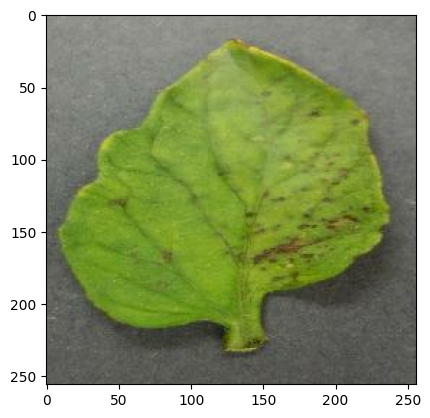

In [29]:
# visualize an image with the predicted label
for images_batch, labels_batch in test_dataset.take(1):
    # print(images_batch[0].numpy().astype('uint'))
    # plt.imshow(images_batch[0].numpy().astype('uint'))

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    # explain this step by step
    print("The first image to predict")
    plt.imshow(first_image)
    print("The first image's actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [5]:
# potom tu das tu funkciu na predikciu viacerych obrazkov a to bude vsetko na teraz

In [1]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(10, 10))  

# Iterate over one batch of images and labels from the test dataset
for images, labels in test_ds.take(1):
    for i in range(4):  # Change the range to 4 to show only 4 images
        ax = plt.subplot(2, 2, i + 1)  # Adjust the grid to 2x2
        plt.imshow(images[i].numpy().astype("uint8"))

        # Assuming `predict` is a custom function that returns the predicted class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence:.2f}%")
        plt.axis("off")

plt.show()  # Ensure the plot is displayed